Ibrahim, Anas, Zarin, Muhammad

1. Import, read and specify dataset

Preparation of Data



In [ ]:
from time import time
import random

import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# remove titles and read in latin
df_raw = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding = "ISO-8859-1", header=None)

 # Add column title
df_raw.columns = ["label", "time", "date", "query", "username", "text"]

# View dataframes - specify how many to view
df_raw.head(1)

,label,time,date,query,username,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."


In [ ]:
# 4 = +
# 0 = -
df_raw['label'].value_counts()

4    800000
0    800000
Name: label, dtype: int64

In [ ]:
# Keep text and label, delete everything else (label text)
df = df_raw[['label', 'text']]
df.head()

,label,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
# Distinguish between pos and neg rows
df_pos = df[df['label'] == 4]
df_neg = df[df['label'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


In [ ]:
# Divide and choose appropriate portion of dataset. 

df_pos = df_pos.iloc[:int(len(df_pos)/64)]
df_neg = df_neg.iloc[:int(len(df_neg)/64)]
print(len(df_pos), len(df_neg))

12500 12500


In [ ]:
# Concatinating both positive and negative groups and storing them back into a single dataframe
df = pd.concat([df_pos, df_neg])
len(df)

25000

In [ ]:
start_time = time()

from nltk.tokenize import TweetTokenizer
# The redule_len parameter will allow a maximum of 3 consecutive repeating characters, while trimming the rest
# For example, it will tranform the word: 'Helloooooooooo' to: 'Hellooo'
tk = TweetTokenizer(reduce_len=True)

data = []

# Separating our features (text) and our labels into two lists to smoothen our work
X = df['text'].tolist()
Y = df['label'].tolist()

#Building our data list, that is a list of tuples, where each tuple is a pair of the tokenized text and its corresponding label
for x, y in zip(X, Y):
    if y == 4:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))
        
# Printing the CPU time and the first 5 elements of our 'data' list
print('CPU Time:', time() - start_time)
data[:5]

CPU Time: 2.627612829208374


[(['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best', '!', '!'],
  1),
 (['im',
   'meeting',
   'up',
   'with',
   'one',
   'of',
   'my',
   'besties',
   'tonight',
   '!',
   'Cant',
   'wait',
   '!',
   '!',
   '-',
   'GIRL',
   'TALK',
   '!',
   '!'],
  1),
 (['@DaRealSunisaKim',
   'Thanks',
   'for',
   'the',
   'Twitter',
   'add',
   ',',
   'Sunisa',
   '!',
   'I',
   'got',
   'to',
   'meet',
   'you',
   'once',
   'at',
   'a',
   'HIN',
   'show',
   'here',
   'in',
   'the',
   'DC',
   'area',
   'and',
   'you',
   'were',
   'a',
   'sweetheart',
   '.'],
  1),
 (['Being',
   'sick',
   'can',
   'be',
   'really',
   'cheap',
   'when',
   'it',
   'hurts',
   'too',
   'much',
   'to',
   'eat',
   'real',
   'food',
   'Plus',
   ',',
   'your',
   'friends',
   'make',
   'you',
   'soup'],
  1),
 (['@LovesBrooklyn2', 'he', 'has', 'that', 'effect', 'on', 'everyone'], 1)]

In [ ]:
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

# Previewing the pos_tag() output
#print(pos_tag(data[0][0]))

In [ ]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        # First, we will convert the pos_tag output tags to a tag format that the WordNetLemmatizer can interpret
        # In general, if a tag starts with NN, the word is a noun and if it stars with VB, the word is a verb.
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

# Previewing the WordNetLemmatizer() output
#print(lemmatize_sentence(data[0][0]))

Cleaning dataset and removing meaningless words.

In [ ]:
import re, string
import nltk
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Stopwords are frequently-used words (such as “the”, “a”, “an”, “in”) that do not hold any meaning useful to extract sentiment.
# If it's your first time ever using nltk, you can download nltk's stopwords using: nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS = stopwords.words('english')

# A custom function defined in order to fine-tune the cleaning of the input text. This function is highly dependent on each usecase.
# Note: Only include misspelling or abbreviations of commonly used words. Including many minimally present cases would negatively impact the performance. 
def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25':
        return ''
    return token

# This function will be our all-in-one noise removal function
def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Eliminating the token if it is a link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        cleaned_token = cleaned(token.lower())
        
        # Eliminating the token if its length is less than 3, if it is a punctuation or if it is a stopword
        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

# Prevewing the remove_noise() output
print(remove_noise(data[0][0]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
['love', 'guy', 'best']


In [ ]:
start_time = time()

# As the Naive Bayesian classifier accepts inputs in a dict-like structure,
# we have to define a function that tranforms our data into the required input structure
def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

# Removing noise from all the data
for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

final_data = []

# Transforming the data to fit the input strucutre of the Naive Bayesian classifier
for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))
    
print('Data Prepared for model, CPU Time:', time() - start_time)

# Previewing our final (tokenized, cleaned and lemmatized) data list
final_data[:5]

Removed Noise, CPU Time: 19.900988340377808
Data Prepared for model, CPU Time: 0.1806797981262207


[({'best': True, 'guy': True, 'love': True}, 1),
 ({'besties': True,
   'cant': True,
   'girl': True,
   'meet': True,
   'one': True,
   'talk': True,
   'tonight': True,
   'wait': True},
  1),
 ({'add': True,
   'area': True,
   'get': True,
   'hin': True,
   'meet': True,
   'show': True,
   'sunisa': True,
   'sweetheart': True,
   'thanks': True,
   'twitter': True},
  1),
 ({'cheap': True,
   'eat': True,
   'food': True,
   'friend': True,
   'hurt': True,
   'make': True,
   'much': True,
   'plus': True,
   'real': True,
   'really': True,
   'sick': True,
   'soup': True},
  1),
 ({'effect': True, 'everyone': True}, 1)]

In [ ]:
start_time = time()

from wordcloud import WordCloud, STOPWORDS

positive_words = []
negative_words = []

# Separating out positive and negative words (i.e., words appearing in negative and positive tweets),
# in order to visualize each set of words seperately
for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    else:
        negative_words.extend(cleaned_tokens_list[i][0])

# Defining our word cloud drawing function
#def wordcloud_draw(data, color = 'black'):
    #wordcloud = WordCloud(stopwords = STOPWORDS,
                          #background_color = color,
                          #width = 2500,
                          #height = 2000
                         #).generate(' '.join(data))
    #plt.figure(1, figsize = (13, 13))
    #plt.imshow(wordcloud)
    #plt.axis('off')
    #plt.show()
    
#print("Positive words")
#wordcloud_draw(positive_words, 'white')
#print("Negative words")
#wordcloud_draw(negative_words)        

print('CPU Time:', time() - start_time)

CPU Time: 0.05377554893493652


2. Naive Bayes Algorithm

In [ ]:
import random

# .Random(140) randomizes our data with seed = 140. This guarantees the same shuffling for every execution of our code
# Feel free to alter this value or even omit it to have different outputs for each code execution
random.Random(140).shuffle(final_data)

#  90% train data and 10% test data

trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

[          90%             ] - Trained
[  10%  ] - New data, predict and classify according to |^|

In [ ]:
start_time = time()

from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

# Output the model accuracy on the train and test data
print('Accuracy on train data:', classify.accuracy(classifier, train_data))
print('Accuracy on test data:', classify.accuracy(classifier, test_data))

# Output the words that provide the most information about the sentiment of a tweet.
# These are words that are heavily present in one sentiment group and very rarely present in the other group.
print(classifier.show_most_informative_features(20))

print('\nCPU Time:', time() - start_time)

Accuracy on train data: 0.8698222222222223
Accuracy on test data: 0.734
Most Informative Features
                 stomach = True                0 : 1      =     19.1 : 1.0
                    sick = True                0 : 1      =     18.5 : 1.0
                     thx = True                1 : 0      =     18.3 : 1.0
                  throat = True                0 : 1      =     18.2 : 1.0
                  lonely = True                0 : 1      =     18.2 : 1.0
                   tummy = True                0 : 1      =     17.1 : 1.0
                 missing = True                0 : 1      =     15.1 : 1.0
                 welcome = True                1 : 0      =     14.9 : 1.0
                     gah = True                0 : 1      =     14.4 : 1.0
                  gutted = True                0 : 1      =     13.7 : 1.0
                 dentist = True                0 : 1      =     13.4 : 1.0
                     sad = True                0 : 1      =     13.4 : 1.0
  

In [ ]:
custom_tweet = ""

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


In [ ]:
custom_tweet = "The reward for you is no reward."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


In [ ]:
from sklearn import metrics

# Storing all desired values in a list
y = [test_data[i][1] for i in range(len(test_data))]
# Storing all probabilities of having a positive sentiment in a list
probs = [classifier.prob_classify(test_data[i][0]).prob(1) for i in range(len(test_data))]

# Making sure both values a re equal
print(len(y), len(probs))

# performing the roc curve calculations
fpr, tpr, thresholds = metrics.roc_curve(y, probs)

# Printing the Area Under Curve (AUC) of the ROC curve (the closer to 1, the better)
auc = metrics.roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

2500 2500
AUC: 0.802


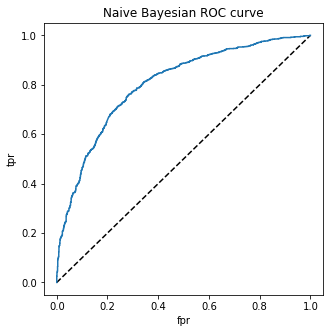

In [ ]:
# Plotting the ROC Curve
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayesian ROC curve')
plt.show()

In [ ]:
import numpy as np

# Creating a confusion matrix (this specific confusion matrix function accepts numpy arrays rather than python lists)

probs = [classifier.classify(test_data[i][0]) for i in range(len(test_data))]
y = np.asarray(y)
probs = np.asarray(probs)
pd.crosstab(y, probs, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,1009,261,1270
1,404,826,1230
All,1413,1087,2500


3. Deep Learning through LSTM

In [ ]:
# Downloading and unzipping the glove word embeddings from the official website

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2020-12-02 21:48:46--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-12-02 21:48:46--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-12-02 21:48:47--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
# Defining a handy function in order to load a given glove file

def read_glove_vecs(glove_file):
    with open(glove_file, 'r', encoding="utf8") as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [ ]:
# Loading the 50-dimensional GloVe embeddings
# This method will return three dictionaries:
# * word_to_index: a dictionary mapping from words to their indices in the vocabulary
# * index_to_word: dictionary mapping from indices to their corresponding words in the vocabulary
# * word_to_vec_map: dictionary mapping words to their GloVe vector representation
# Note that there are 400,001 words, with the valid indices ranging from 0 to 400,000

word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('glove.6B.50d.txt')

In [ ]:
word_to_index['hello']
word_to_vec_map['hello']
word_to_index['unk']


372306

In [ ]:
def cosine_similarity(u, v):
    dot = np.dot(u, v)
    norm_u = np.sqrt(np.sum(u**2))
    norm_v = np.sqrt(np.sum(v**2))
    cosine_similarity = dot / (norm_u * norm_v)
    return cosine_similarity

In [ ]:
cosine_similarity(word_to_vec_map['cucumber'], word_to_vec_map['tomato'])

0.8632714714841137

In [ ]:
cosine_similarity(word_to_vec_map['cucumber'], word_to_vec_map['phone'])

-0.012485506721235957

In [ ]:
start_time = time()

unks = []
UNKS = []

# This function will act as a "last resort" in order to try and find the word
# in the words embedding layer. It will basically eliminate contiguously occuring
# instances of a similar character
def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res


def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

        
# Here we will utilize the already computed 'cleaned_tokens_list' variable
   
print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)

X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))

for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:5])
print(Y[:5])

Removed Noise, CPU Time: 0.00026726722717285156
max_len: 19
Data Prepared for model, CPU Time: 0.0036323070526123047
[[226278. 169725.  74390.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [239785. 269953. 372306. 361859.  91041. 382320. 161844. 352214.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [357161. 368306.  46173. 372306. 160418. 239785. 179025. 329974.  58999.
  349437.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]
 [330826. 302352.  97698. 184322. 251645. 132701. 302292. 151204. 286963.
  154049. 231458. 338210.      0.      0.      0.      0.      0.      0.
       0.]
 [133896. 141948.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.]]
[1. 1. 1. 1. 1.]


In [ ]:
import keras
from keras import Sequential
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split

In [ ]:
# Defining a function that will initialize and populate our embedding layer

def pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len):
    vocab_len = len(word_to_index) + 1
    emb_dim = word_to_vec_map["unk"].shape[0] #50
    
    emb_matrix = np.zeros((vocab_len, emb_dim))
    
    for word, idx in word_to_index.items():
        emb_matrix[idx, :] = word_to_vec_map[word]
        
    embedding_layer = Embedding(vocab_len, emb_dim, trainable=False, input_shape=(max_len,))
    embedding_layer.build((None,))
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [ ]:
# Add LSTM layers and the final layer is the sigmoid layer which is responsible for classifying between 0 and 1 ie between negative and positive
.

model = Sequential()

model.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model.add(Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 19, 50)            20000050  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 19, 256)           183296    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
_________________________________________________________________


In [ ]:
# Compile and use Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [ ]:
len(X_train)

312

In [ ]:
len(X_test)

78

4. Training the LSTM Model (Time Consuming)

In [ ]:
# Tweak batchsize and epoch

model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
3/3 [==============================] - 2s 672ms/step - loss: 0.6925 - accuracy: 0.4904 - val_loss: 0.6997 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 0s 162ms/step - loss: 0.7167 - accuracy: 0.5032 - val_loss: 0.6918 - val_accuracy: 0.5641
Epoch 3/20
3/3 [==============================] - 1s 185ms/step - loss: 0.6666 - accuracy: 0.6250 - val_loss: 0.7085 - val_accuracy: 0.5000
Epoch 4/20
3/3 [==============================] - 1s 169ms/step - loss: 0.6645 - accuracy: 0.5513 - val_loss: 0.6956 - val_accuracy: 0.5128
Epoch 5/20
3/3 [==============================] - 1s 169ms/step - loss: 0.6481 - accuracy: 0.6410 - val_loss: 0.6755 - val_accuracy: 0.5256
Epoch 6/20
3/3 [==============================] - 0s 165ms/step - loss: 0.6265 - accuracy: 0.7019 - val_loss: 0.6723 - val_accuracy: 0.5897
Epoch 7/20
3/3 [==============================] - 0s 167ms/step - loss: 0.5999 - accuracy: 0.6955 - val_loss: 0.6866 - val_accuracy: 0.5641
Epoch 8/20
3/3 [====

In [ ]:

def plot_acc_loss(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label = 'Testing Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.figure()
    plt.plot(epochs, loss, 'bo', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

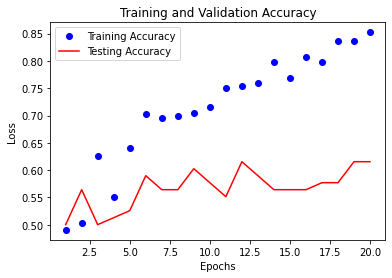

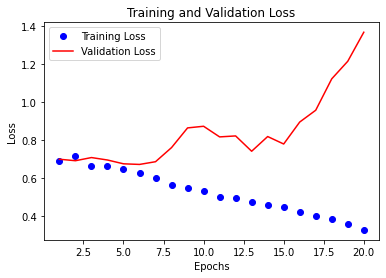

In [ ]:
# Plotting the obtained training and validation loss and accuracy progressions.
plot_acc_loss(model.history)

**Regularization** is the process of preventing a model from over-fitting the training data.
Dropout : randomly eliminates several (based on a parametrized percentage rate) neurons connections in the network, rendering the model less complex, and forcing the model to only look at part of a given example.

In [ ]:
keras.backend.clear_session()

model_dropout = Sequential()

model_dropout.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_dropout.add(Dropout(rate=0.4))
model_dropout.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_dropout.add(Dense(units=1, activation='sigmoid'))

model_dropout.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 19, 50)            20000050  
_________________________________________________________________
dropout (Dropout)            (None, 19, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 19, 256)           183296    
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 256)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
______________________________________

In [ ]:
model_dropout.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Week 4 : Regularization

In [ ]:
model_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
3/3 [==============================] - 2s 592ms/step - loss: 0.6933 - accuracy: 0.5192 - val_loss: 0.6809 - val_accuracy: 0.6154
Epoch 2/20
3/3 [==============================] - 1s 169ms/step - loss: 0.6754 - accuracy: 0.5962 - val_loss: 0.6760 - val_accuracy: 0.6282
Epoch 3/20
3/3 [==============================] - 1s 173ms/step - loss: 0.6618 - accuracy: 0.6122 - val_loss: 0.6783 - val_accuracy: 0.5769
Epoch 4/20
3/3 [==============================] - 1s 173ms/step - loss: 0.6488 - accuracy: 0.6538 - val_loss: 0.6630 - val_accuracy: 0.6795
Epoch 5/20
3/3 [==============================] - 1s 172ms/step - loss: 0.6190 - accuracy: 0.6538 - val_loss: 0.6723 - val_accuracy: 0.6410
Epoch 6/20
3/3 [==============================] - 1s 170ms/step - loss: 0.6470 - accuracy: 0.6058 - val_loss: 0.6741 - val_accuracy: 0.6154
Epoch 7/20
3/3 [==============================] - 1s 167ms/step - loss: 0.6063 - accuracy: 0.6538 - val_loss: 0.6975 - val_accuracy: 0.6410
Epoch 8/20
3/3 [====

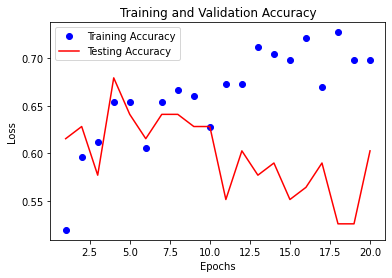

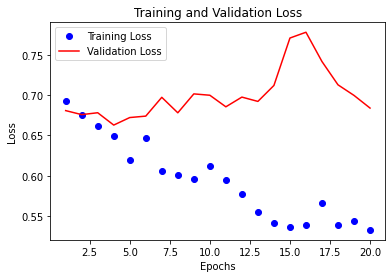

In [ ]:
plot_acc_loss(model_dropout.history)

In [ ]:
model_dropout.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
3/3 [==============================] - 1s 185ms/step - loss: 0.5622 - accuracy: 0.6987 - val_loss: 0.7093 - val_accuracy: 0.5513
Epoch 2/20
3/3 [==============================] - 1s 167ms/step - loss: 0.4946 - accuracy: 0.7500 - val_loss: 0.7676 - val_accuracy: 0.5128
Epoch 3/20
3/3 [==============================] - 1s 168ms/step - loss: 0.5050 - accuracy: 0.7340 - val_loss: 0.7623 - val_accuracy: 0.5641
Epoch 4/20
3/3 [==============================] - 1s 169ms/step - loss: 0.5371 - accuracy: 0.7212 - val_loss: 0.7529 - val_accuracy: 0.5513
Epoch 5/20
3/3 [==============================] - 1s 174ms/step - loss: 0.4846 - accuracy: 0.7564 - val_loss: 0.8162 - val_accuracy: 0.5385
Epoch 6/20
3/3 [==============================] - 1s 171ms/step - loss: 0.5190 - accuracy: 0.7179 - val_loss: 0.7079 - val_accuracy: 0.5641
Epoch 7/20
3/3 [==============================] - 1s 172ms/step - loss: 0.4832 - accuracy: 0.7788 - val_loss: 0.7165 - val_accuracy: 0.5769
Epoch 8/20
3/3 [====

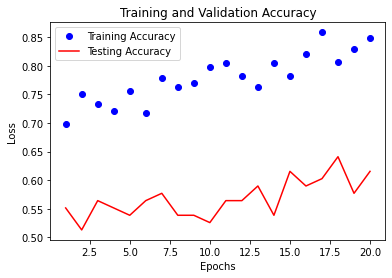

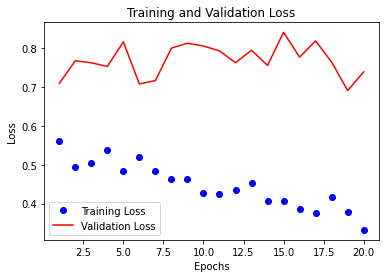

In [ ]:
plot_acc_loss(model_dropout.history)

In [ ]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1

n_unk_words

193

In [ ]:
len(unks)

193

In [ ]:
len(UNKS)

216

In [ ]:
from collections import Counter
Counter(unks).most_common(50)

[("i'm", 40),
 ("can't", 13),
 ("that's", 7),
 ("i'l", 6),
 ("i've", 5),
 ("he's", 3),
 ('hahaha', 3),
 ('ihad', 2),
 ("there's", 2),
 ('b-day', 2),
 ('besties', 1),
 ('sunisa', 1),
 ('thans', 1),
 ("acm's", 1),
 ('<lol>', 1),
 ('gumaling', 1),
 ('makakasama', 1),
 ('bacn', 1),
 ('folowinq', 1),
 ('kiteh', 1),
 ('slushie', 1),
 ('indowebster', 1),
 ('ryt', 1),
 ('sheldawg', 1),
 ("bufy's", 1),
 ('#devunity', 1),
 ('->', 1),
 ('twetland', 1),
 (';-p', 1),
 ('nodlebox', 1),
 ('2982378', 1),
 ('losiento', 1),
 ('#alexa', 1),
 ('geking', 1),
 ('spacecowboy', 1),
 ('clubzone', 1),
 ('hithavaru', 1),
 ('ninage', 1),
 ('movarolage', 1),
 ('oach', 1),
 ("what'd", 1),
 ('shenagians', 1),
 ("we're", 1),
 ("it'l", 1),
 ('nkow', 1),
 ('paris-roubaix', 1),
 ('holidayholiday', 1),
 ('knighty', 1),
 ('nitey', 1),
 ("here's", 1)]

In [ ]:

def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow' or token == '2moro':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token in ['hahah', 'hahaha', 'hahahaha']:
        return 'haha'
    if token == "mother's":
        return "mother"
    if token == "mom's":
        return "mom"
    if token == "dad's":
        return "dad"
    if token == 'bday' or token == 'b-day':
        return 'birthday'
    if token in ["i'm", "don't", "can't", "couldn't", "aren't", "wouldn't", "isn't", "didn't", "hadn't",
                 "doesn't", "won't", "haven't", "wasn't", "hasn't", "shouldn't", "ain't", "they've"]:
        return token.replace("'", "")
    if token in ['lmao', 'lolz', 'rofl']:
        return 'lol'
    if token == '<3':
        return 'love'
    if token == 'thanx' or token == 'thnx':
        return 'thanks'
    if token == 'goood':
        return 'good'
    if token in ['amp', 'quot', 'lt', 'gt', '½25', '..', '. .', '. . .']:
        return ''
    return token


# This function will be our all-in-one noise removal function
def remove_noise(tweet_tokens):

    cleaned_tokens = []

    for token in tweet_tokens:
        # Eliminating the token if it is a link
        token = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", token)
        # Eliminating the token if it is a mention
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        cleaned_token = cleaned(token.lower())
        
        if cleaned_token == "idk":
            cleaned_tokens.append('i')
            cleaned_tokens.append('dont')
            cleaned_tokens.append('know')
            continue
        if cleaned_token == "i'll":
            cleaned_tokens.append('i')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "you'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "we'll":
            cleaned_tokens.append('we')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it'll":
            cleaned_tokens.append('it')
            cleaned_tokens.append('will')
            continue
        if cleaned_token == "it's":
            cleaned_tokens.append('it')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i've":
            cleaned_tokens.append('i')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you've":
            cleaned_tokens.append('you')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "we've":
            cleaned_tokens.append('we')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "they've":
            cleaned_tokens.append('they')
            cleaned_tokens.append('have')
            continue
        if cleaned_token == "you're":
            cleaned_tokens.append('you')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "we're":
            cleaned_tokens.append('we')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "they're":
            cleaned_tokens.append('they')
            cleaned_tokens.append('are')
            continue
        if cleaned_token == "let's":
            cleaned_tokens.append('let')
            cleaned_tokens.append('us')
            continue
        if cleaned_token == "she's":
            cleaned_tokens.append('she')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "he's":
            cleaned_tokens.append('he')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "that's":
            cleaned_tokens.append('that')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "i'd":
            cleaned_tokens.append('i')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "you'd":
            cleaned_tokens.append('you')
            cleaned_tokens.append('would')
            continue
        if cleaned_token == "there's":
            cleaned_tokens.append('there')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "what's":
            cleaned_tokens.append('what')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "how's":
            cleaned_tokens.append('how')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "who's":
            cleaned_tokens.append('who')
            cleaned_tokens.append('is')
            continue
        if cleaned_token == "y'all" or cleaned_token == "ya'll":
            cleaned_tokens.append('you')
            cleaned_tokens.append('all')
            continue

        if cleaned_token.strip() and cleaned_token not in string.punctuation: 
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens


# Prevewing the remove_noise() output
print(remove_noise(data[0][0]))

['i', 'love', 'you', 'guys', 'are', 'the', 'best']


In [ ]:
start_time = time()

unks = []
UNKS = []

def cleared(word):
    res = ""
    prev = None
    for char in word:
        if char == prev: continue
        prev = char
        res += char
    return res

def sentence_to_indices(sentence_words, word_to_index, max_len, i):
    global X, Y
    sentence_indices = []
    for j, w in enumerate(sentence_words):
        try:
            index = word_to_index[w]
        except:
            UNKS.append(w)
            w = cleared(w)
            try:
                index = word_to_index[w]
            except:
                index = word_to_index['unk']
                unks.append(w)
        X[i, j] = index

cleaned_tokens_list = []

# Removing noise from all the data, using the newly defined function
for tokens, label in data:
    x = remove_noise(tokens)
    if x:
        cleaned_tokens_list.append((x, label))

print('Removed Noise, CPU Time:', time() - start_time)
start_time = time()

list_len = [len(i) for i, j in cleaned_tokens_list]
max_len = max(list_len)
print('max_len:', max_len)


X = np.zeros((len(cleaned_tokens_list), max_len))
Y = np.zeros((len(cleaned_tokens_list), ))


for i, tk_lb in enumerate(cleaned_tokens_list):
    tokens, label = tk_lb
    sentence_to_indices(tokens, word_to_index, max_len, i)
    Y[i] = label
    
print('Data Prepared for model, CPU Time:', time() - start_time)


print(X[:5])
print(Y[:5])

Removed Noise, CPU Time: 0.025955915451049805
max_len: 29
Data Prepared for model, CPU Time: 0.004152059555053711
[[185457. 226278. 394475. 169754.  58997. 357266.  74390.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.]
 [187631. 239792. 373317. 388711. 269953. 268046. 254258. 372306. 361859.
   91041. 382320. 161844. 352214.      0.      0.      0.      0.      0.
       0.      0.      0.      0.      0.      0.      0.      0.      0.
       0.      0.]
 [357161. 151349. 357266. 368306.  46173. 372306. 185457. 164934. 360915.
  239785. 394475. 269889.  62065.  43010. 179025. 329974. 177231. 188481.
  357266. 118061.  58999.  54718. 394475. 385664.  43010. 349437.      0.
       0.      0.]
 [ 72182. 330826.  90548.  71090. 302352.  97698. 386424. 193716. 184338.
  361940. 251645. 360915. 132701. 302292. 151204. 286963. 394565. 154060.
  231458. 39447

In [ ]:
unk = word_to_index['unk']

n_unk_words = 0

for x in X:
    for y in x:
        if y == unk:
            n_unk_words += 1

n_unk_words

105

In [ ]:
# Counts the most common words and represent in a tuple.
from collections import Counter
Counter(unks).most_common(50)

[('ihad', 2),
 ('besties', 1),
 ('sunisa', 1),
 ('thans', 1),
 ("acm's", 1),
 ('<lol>', 1),
 ('gumaling', 1),
 ('makakasama', 1),
 ('bacn', 1),
 ('folowinq', 1),
 ('kiteh', 1),
 ('=/', 1),
 ('slushie', 1),
 ('indowebster', 1),
 ('ryt', 1),
 ('sheldawg', 1),
 ("bufy's", 1),
 ('#devunity', 1),
 ('->', 1),
 ('twetland', 1),
 (';-p', 1),
 ('nodlebox', 1),
 ('2982378', 1),
 ('losiento', 1),
 ('#alexa', 1),
 ('geking', 1),
 ('spacecowboy', 1),
 ('clubzone', 1),
 ('hithavaru', 1),
 ('ninage', 1),
 ('movarolage', 1),
 ('oach', 1),
 ("what'd", 1),
 ('shenagians', 1),
 ('nkow', 1),
 ('paris-roubaix', 1),
 ('holidayholiday', 1),
 ('knighty', 1),
 ('nitey', 1),
 ("here's", 1),
 ('overitnow', 1),
 ('#japan', 1),
 ('#skype', 1),
 ('mo-old', 1),
 ('youï', 1),
 ('½re', 1),
 ('manies', 1),
 ('pedies', 1),
 ('frezer-worthy', 1),
 ('#expletives', 1)]

In [ ]:
keras.backend.clear_session()

model_clean_data = Sequential()

model_clean_data.add(pretrained_embedding_layer(word_to_vec_map, word_to_index, max_len))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model_clean_data.add(Bidirectional(LSTM(units=128, return_sequences=False)))
model_clean_data.add(Dense(units=1, activation='sigmoid'))

model_clean_data.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 29, 50)            20000050  
_________________________________________________________________
bidirectional (Bidirectional (None, 29, 256)           183296    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 20,577,843
Trainable params: 577,793
Non-trainable params: 20,000,050
_________________________________________________________________


In [ ]:
model_clean_data.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

In [ ]:
len(X_train)

312

In [ ]:
len(X_test)

78

In [ ]:
model_clean_data.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 20, batch_size = 128, shuffle=True)

Epoch 1/20
3/3 [==============================] - 1s 236ms/step - loss: 0.2805 - accuracy: 0.8814 - val_loss: 1.1106 - val_accuracy: 0.5641
Epoch 2/20
3/3 [==============================] - 1s 227ms/step - loss: 0.2417 - accuracy: 0.9038 - val_loss: 1.2720 - val_accuracy: 0.5641
Epoch 3/20
3/3 [==============================] - 1s 225ms/step - loss: 0.2143 - accuracy: 0.9199 - val_loss: 1.2934 - val_accuracy: 0.5769
Epoch 4/20
3/3 [==============================] - 1s 229ms/step - loss: 0.2036 - accuracy: 0.9135 - val_loss: 1.3772 - val_accuracy: 0.5513
Epoch 5/20
3/3 [==============================] - 1s 223ms/step - loss: 0.1630 - accuracy: 0.9423 - val_loss: 1.5740 - val_accuracy: 0.5641
Epoch 6/20
3/3 [==============================] - 1s 229ms/step - loss: 0.1677 - accuracy: 0.9231 - val_loss: 1.6092 - val_accuracy: 0.6026
Epoch 7/20
3/3 [==============================] - 1s 228ms/step - loss: 0.2109 - accuracy: 0.9103 - val_loss: 1.5812 - val_accuracy: 0.5256
Epoch 8/20
3/3 [====

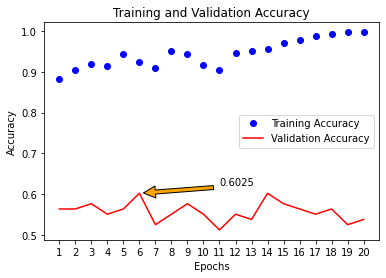

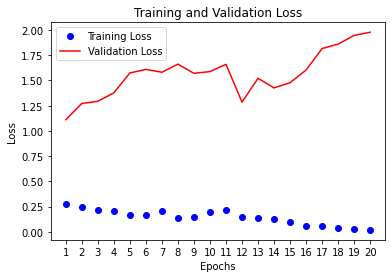

In [ ]:
history = model_clean_data.history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
y_arrow = max(val_acc)
x_arrow = val_acc.index(y_arrow) + 1
plt.annotate(str(y_arrow)[:6],
             (x_arrow, y_arrow),
             xytext=(x_arrow + 5, y_arrow + .02),
             arrowprops=dict(facecolor='orange', shrink=0.05))
plt.xticks(epochs)

plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xticks(epochs)
plt.show()

In [ ]:
def i_to_sentence(I):
    sentence = ""
    for i in I:
        if i:
            sentence += index_to_word[int(i)] + " "
        else:
            break
    return sentence

In [ ]:
# Displays acquired tweets with corresponding sentiment prediction/classification.
C = 0

pred = model_clean_data.predict(X_test)

for i in range(len(X_test)):
    final_pred = 1 if pred[i] > 0.5 else 0
    
    if(final_pred != Y_test[i]):
        print('Expected sentiment:' + str(int(Y_test[i])) + '. Input: ' + i_to_sentence(X_test[i]))
        C += 1
        
    if C > 100:
        break

Expected sentiment:1. Input: saw the tvc yesterday worked for me 
Expected sentiment:1. Input: today is our two month anniversary i love you sooo much diana omg you dont even know tar heels won the ncaa woot 
Expected sentiment:1. Input: still buzzing from unk ... thanks to for pushing the old boundaries boy someone could make money off a twitter manual ... 
Expected sentiment:1. Input: yay lol i just requested her what did she say 
Expected sentiment:0. Input: damn the grind is inspirational and saddening at the same time dont want you to stop cuz i like what you do much love 
Expected sentiment:1. Input: haha im not saying you should try it but maybe you should 
Expected sentiment:0. Input: so many channels ... yet so so boring ... lazy day again may have to find a hobby 
Expected sentiment:1. Input: agreed 
Expected sentiment:1. Input: i responded stupid cat is helping me type forgive errors 
Expected sentiment:0. Input: mo jobs no money how in the hell is min wage here 4 unk clams 